In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [5]:
import os
from PIL import Image
import numpy as np

os.makedirs('sample_data/class_a', exist_ok=True)
os.makedirs('sample_data/class_b', exist_ok=True)

for i in range(10):
    img = Image.fromarray(np.ones((224, 224, 3), dtype=np.uint8) * 255)
    img.save(f'sample_data/class_a/img_{i}.jpg')

    img = Image.fromarray(np.zeros((224, 224, 3), dtype=np.uint8))
    img.save(f'sample_data/class_b/img_{i}.jpg')

print("Sample images created in 'sample_data/'")

Sample images created in 'sample_data/'


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

print(f"Found {train_generator.samples} images belonging to {train_generator.num_classes} classes.")

if train_generator.samples > 0:
    model.fit(train_generator, epochs=10)

Found 20 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.6545
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 4.9237
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 0.4859
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 1.1572
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.5000 - loss: 1.2642
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5000 - loss: 1.0681
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 0.7571
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 0.5125
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 1.0000 - loss: 0.4837
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step - accuracy: 0.5000 - loss: 0.5828


In [7]:
for layer in base_model.layers[-4:]:
    layer.trainable = True

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(train_generator, epochs=10)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 17s 17s/step - accuracy: 0.5000 - loss: 0.6616
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 3.8919
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.6650
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 22s 22s/step - accuracy: 0.5000 - loss: 0.6580
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.6151
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.5000 - loss: 1.1238
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.9995
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.8150
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 1.0000 - loss: 0.5612
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 21s 21s/step - accuracy: 0.5000 - loss: 0.6743


Found 16 images belonging to 2 classes.
Found 4 images belonging to 2 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.6184 - val_accuracy: 0.5000 - val_loss: 0.5327
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 0.5000 - loss: 0.5327 - val_accuracy: 1.0000 - val_loss: 0.4278
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 1.0000 - loss: 0.4278 - val_accuracy: 1.0000 - val_loss: 0.2876
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 1.0000 - loss: 0.2876 - val_accuracy: 1.0000 - val_loss: 0.2089
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.2089 - val_accuracy: 1.0000 - val_loss: 0.0852
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.0852 - val_accuracy: 1.0000 - val_loss: 0.0317
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step - accuracy: 1.0000 - loss: 0.0317 - val_accuracy: 1.0000 - val_loss: 0.0097
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/st

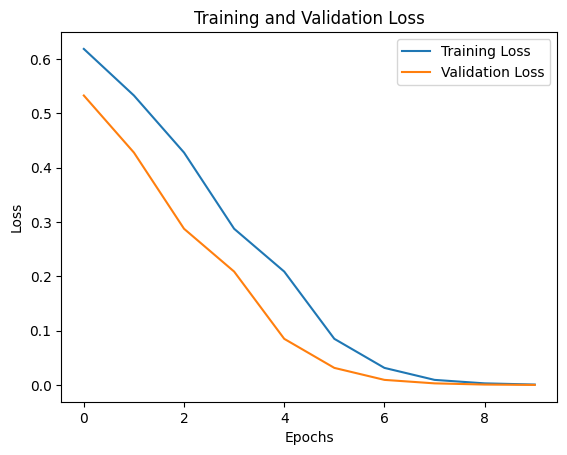

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'sample_data',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()